Response = Intercept + Constant + Explanatory

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')

<AxesSubplot:xlabel='wt', ylabel='mpg'>

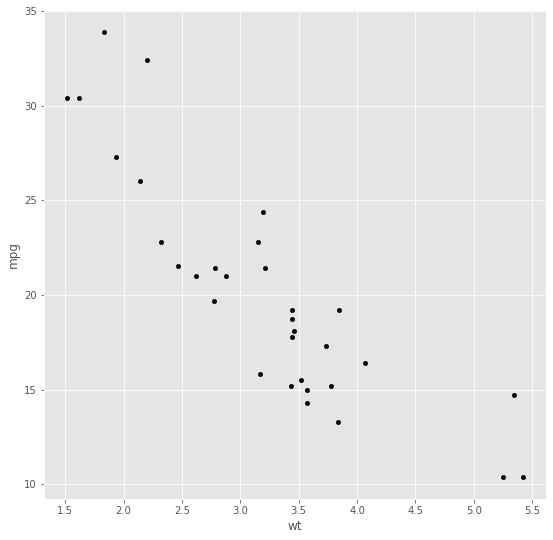

In [2]:
mtcars=pd.read_csv("mtcars.csv")
mtcars.plot(kind="scatter",
           x="wt",        #weight of car
           y="mpg",       #miles per gallon(mileage)
           figsize=(9,9),
           color="black")

In [3]:
#Initialize model
regression_model=LinearRegression()

#Train the model using mtcars data
regression_model.fit(X=pd.DataFrame(mtcars["wt"]),
                    y=mtcars["mpg"])

#Check trained model y-intercept
print(regression_model.intercept_)

#Check trained model coefficients
print(regression_model.coef_)

<IPython.core.display.Javascript object>

37.28512616734204
[-5.34447157]


In [4]:
regression_model.score(X=pd.DataFrame(mtcars["wt"]),
                      y=mtcars["mpg"])
#Gives the r-squared value which ranges from 0 to1

0.7528327936582646

In [5]:
train_prediction=regression_model.predict(X=pd.DataFrame(mtcars["wt"]))

#Actuals - Prediction = Residuals
residuals=mtcars["mpg"]-train_prediction

residuals.describe()

count    3.200000e+01
mean    -4.996004e-15
std      2.996352e+00
min     -4.543151e+00
25%     -2.364709e+00
50%     -1.251956e-01
75%      1.409561e+00
max      6.872711e+00
Name: mpg, dtype: float64

In [6]:
SSResiduals=(residuals**2).sum()
SSTotal=((mtcars["mpg"]-mtcars["mpg"].mean())**2).sum()

#R-squared
1-(SSResiduals/SSTotal)

0.7528327936582646

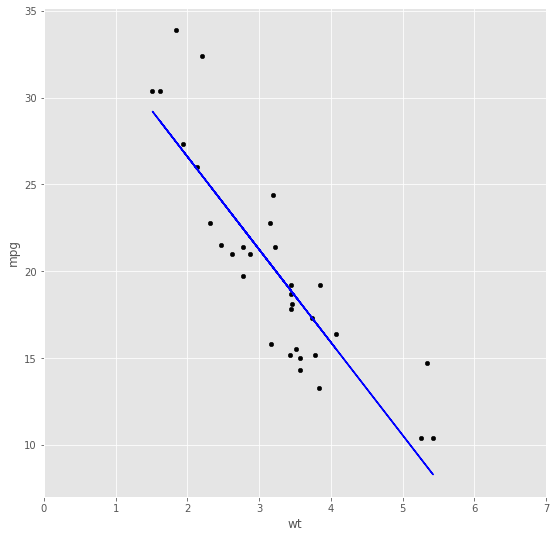

In [7]:
mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim=(0,7))

#Plot regression line
plt.plot(mtcars["wt"],            #Explanitory variable
               train_prediction, #Predicted values
               color="blue")

<IPython.core.display.Javascript object>

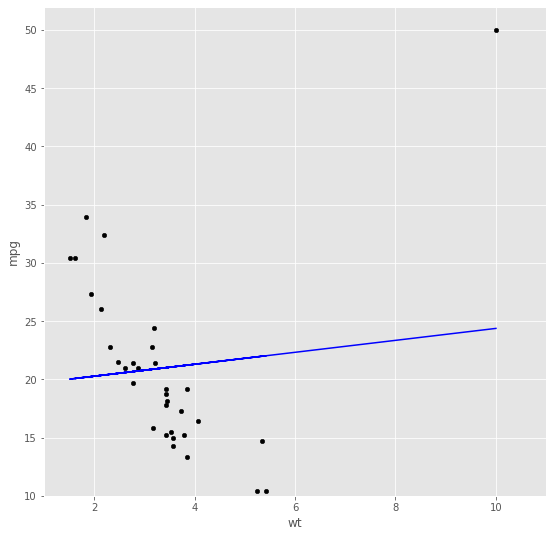

In [8]:
mtcars_subset=mtcars[["mpg","wt"]]
super_car=pd.DataFrame({"mpg":50,"wt":10},index=["super"])
new_cars=mtcars_subset.append(super_car)

#Initialize model
regression_model=LinearRegression()

#Train the model using the new_cars data
regression_model.fit(X=pd.DataFrame(new_cars["wt"]),
                    y=new_cars["mpg"])
train_prediction_2=regression_model.predict(X=pd.DataFrame(new_cars["wt"]))

#Plot the new model
new_cars.plot(kind="scatter",
             x="wt",
             y="mpg",
             figsize=(9,9),
             color="black",
             xlim=(1,11),
             ylim=(10,52))

#Plot regression line
plt.plot(new_cars["wt"],   #Explanatory variable
        train_prediction_2,#Predicted values
        color="blue")

((array([-2.02511189, -1.62590278, -1.38593914, -1.20666642, -1.05953591,
         -0.93235918, -0.81872017, -0.71478609, -0.6180591 , -0.52680137,
         -0.43973827, -0.35589149, -0.27447843, -0.19484777, -0.11643566,
         -0.03873405,  0.03873405,  0.11643566,  0.19484777,  0.27447843,
          0.35589149,  0.43973827,  0.52680137,  0.6180591 ,  0.71478609,
          0.81872017,  0.93235918,  1.05953591,  1.20666642,  1.38593914,
          1.62590278,  2.02511189]),
  array([-4.54315128, -3.90536265, -3.72686632, -3.46235533, -3.20536265,
         -2.97258623, -2.78093991, -2.61100374, -2.28261065, -2.08595212,
         -1.88302362, -1.10014396, -1.0274952 , -0.9197704 , -0.69325453,
         -0.20014396, -0.0502472 ,  0.152043  ,  0.29985604,  0.35642633,
          0.86687313,  1.17334959,  1.20105932,  1.29734994,  1.74619542,
          2.10328764,  2.34995929,  2.46436703,  4.16373815,  5.98107439,
          6.42197917,  6.87271129])),
 (3.0327797489458983, -4.743473967870

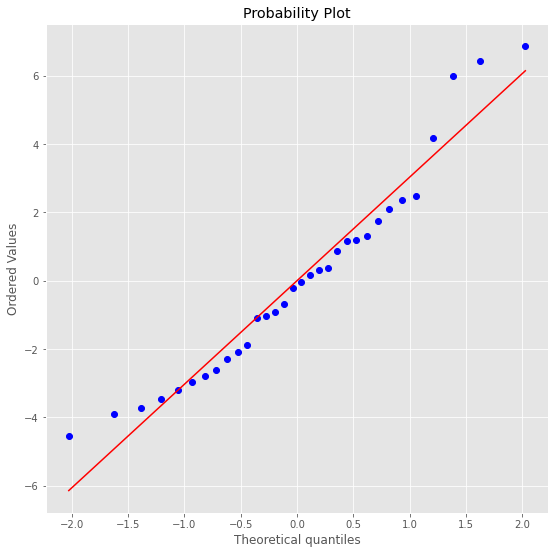

In [9]:
plt.figure(figsize=(9,9))
stats.probplot(residuals,dist="norm",plot=plt)

In [10]:
def rmse(predicted,targets):
    """
    Computes root mean squared error of two numpy ndarrays
    
    Ages:
        predicted: an ndarray of predictions
        targets: an ndarray of target values
    
    Returs:
        The root mean squared error as a float
    """
    return(np.sqrt(np.mean((targets-predicted)**2)))
rmse(train_prediction,mtcars["mpg"])

2.949162685955028

In [11]:
from sklearn.metrics import mean_squared_error
RMSE=mean_squared_error(train_prediction,mtcars["mpg"])**0.5
RMSE

2.949162685955028

POLYNOMIAL REGRESSION

In [12]:
from sklearn import linear_model  #Important
#Initialize model
poly_model=linear_model.LinearRegression()

#Make a DataFrame of predictor variables
predictors=pd.DataFrame([mtcars["wt"],      #Include weight
                        mtcars["wt"]**2]).T #Include weight squared

#Train the model using new_cars data
poly_model.fit(X=predictors,y=mtcars["mpg"])

#Check trained model y-intercept
print("Model Intercept")
print(poly_model.fit_intercept)

#Check trained model coefficients(scaling factor given to "wt")
print("Model coefficients")
print(poly_model.coef_)

#Check R-squared
print("Model R-squared")
print(poly_model.score(X=predictors,
                      y=mtcars["mpg"]))

Model Intercept
True
Model coefficients
[-13.38033708   1.17108689]
Model R-squared
0.8190613581384095


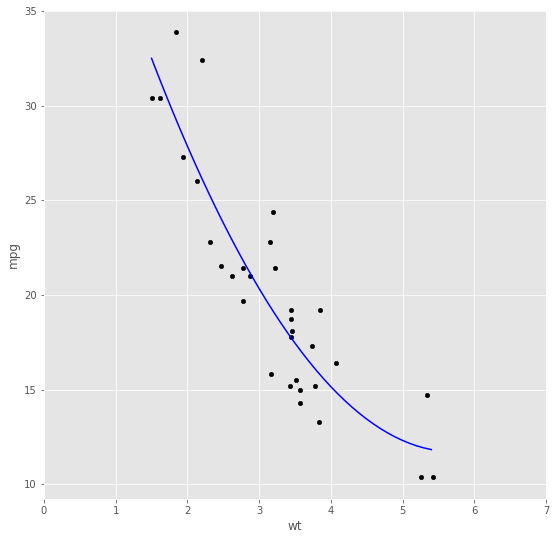

In [13]:
#Plot the curve from 1.5 to 5.5
poly_line_range=np.arange(1.5,5.5,0.1)

#Get the first and second order predictors from range
poly_predictors=pd.DataFrame([poly_line_range,poly_line_range**2]).T

#Get corresponding y values from the model
y_values=poly_model.predict(X=poly_predictors)

mtcars.plot(kind="scatter",x="wt",y="mpg",figsize=(9,9),color="black",xlim=(0,7))

#Plot curve line
plt.plot(poly_line_range, #X-axis range
        y_values,         #Predicted values
        color="blue")

In [14]:
preds=poly_model.predict(X=predictors)
rmse(preds,mtcars["mpg"])

2.5233004724610786

In [15]:
#Initialize model
poly_model=linear_model.LinearRegression()

#Make a DataFrame of predictor variables
predictors=pd.DataFrame([mtcars["wt"],
                         mtcars["wt"]**2,
                         mtcars["wt"]**3,
                         mtcars["wt"]**4,
                         mtcars["wt"]**5,
                         mtcars["wt"]**6,
                         mtcars["wt"]**7,
                         mtcars["wt"]**8,
                         mtcars["wt"]**9,
                         mtcars["wt"]**10]).T

#Train the model using the new_cars data
poly_model.fit(X=predictors,y=mtcars["mpg"])

#Check trained model y-intercept
print("Model Intercept")
print(poly_model.coef_)

#Check R-squared
poly_model.score(X=predictors,
                y=mtcars["mpg"])

Model Intercept
[ 6.45813551e+04 -1.20086129e+05  1.26931926e+05 -8.46598441e+04
  3.73155193e+04 -1.10334754e+04  2.16590402e+03 -2.70730542e+02
  1.94974160e+01 -6.15515431e-01]


0.8702106584850604

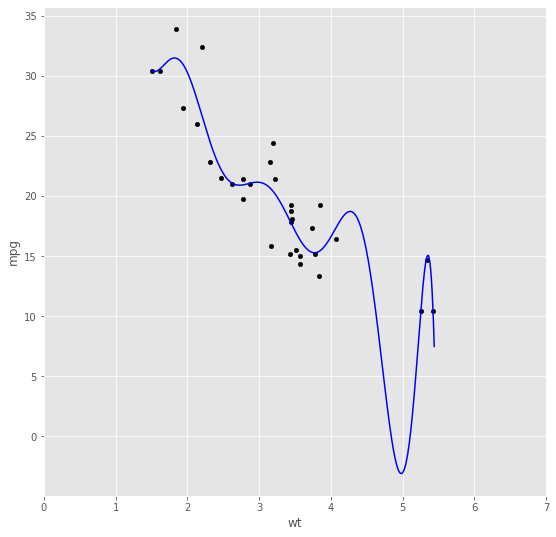

In [16]:
p_range=np.arange(1.5,5.45,0.01)
poly_predictors=pd.DataFrame([p_range,p_range**2,p_range**3,p_range**4,p_range**5,
                              p_range**6,p_range**7,p_range**8,p_range**9,p_range**10]).T

#Get corresponding y values from the model
y_values=poly_model.predict(X=poly_predictors)

mtcars.plot(kind="scatter",x="wt",y="mpg",figsize=(9,9),color="black",xlim=(0,7))

#Plot curve line
plt.plot(p_range,     #X-axis range
        y_values,     #Predicted values
        color="blue")

MULTIPLE LINEAR REGRESSION

In [17]:
#Initialize model
multi_reg_model=linear_model.LinearRegression()

#Train the model using the mtcars data
multi_reg_model.fit(X=mtcars.loc[:,["wt","hp"]],
                   y=mtcars["mpg"])

#Check the trained model y-intercept
print(multi_reg_model.intercept_)

#Check trained model coefficients (scaling factor given to "wt")
print(multi_reg_model.coef_)

#Check R-squared 
multi_reg_model.score(X=mtcars.loc[:,["wt","hp"]],
                     y=mtcars["mpg"])

37.227270116447215
[-3.87783074 -0.03177295]


0.8267854518827914

<AxesSubplot:xlabel='hp', ylabel='mpg'>

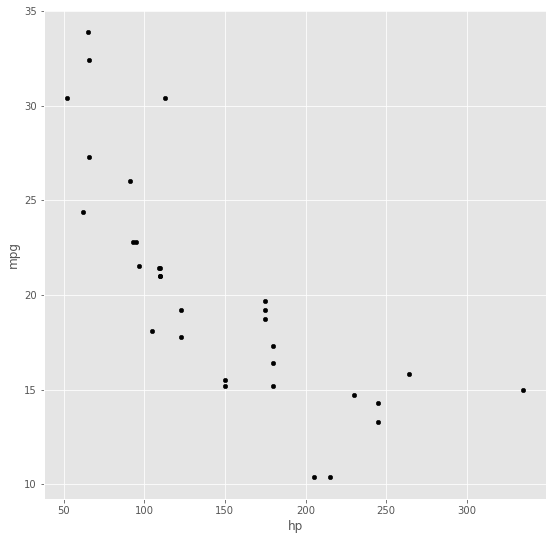

In [18]:
mtcars.plot(kind="scatter",
           x="hp",
           y="mpg",
           figsize=(9,9),
           color="black")

In [21]:
#Initialize model
multi_reg_model=linear_model.LinearRegression()

#Include squared terms
poly_predictors=pd.DataFrame([mtcars["wt"],
                             mtcars["hp"],
                             mtcars["wt"]**2,
                             mtcars["hp"]**2]).T
                              
#Train the model using mtcars data
multi_reg_model.fit(X=poly_predictors,
                   y=mtcars["mpg"])

#Check R-squared
print("R-squared")
print(multi_reg_model.score(X=poly_predictors,y=mtcars["mpg"]))

#Check RMSE
print("RMSE")
print(rmse(multi_reg_model.predict(poly_predictors),mtcars["mpg"]))

R-squared
0.8907279549670641
RMSE
1.9609108134176985


In [22]:
#Check adjusted R-squared
#Formula = 1 - (1-R**2) * (n-1)/(n-p-1)
print("Adjusted R-squared")
print(1-(1-0.89)*((len(mtcars["mpg"])-1)/(len(mtcars["mpg"])-1-4)))

Adjusted R-squared
0.8737037037037038
